# <font color='red'>BackPropagation</font>

**There will be some functions that start with the word "grader" ex: grader_sigmoid(), grader_forwardprop(), grader_backprop() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

## <font color='red'>Loading data </font>

In [1]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>


*  **If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]**.<br><br>
*  **The final output of this graph is a value L which is computed as (Y-Y')^2** 

# <font color='red'>Task 1: Implementing backpropagation and Gradient checking </font>

<font color='blue'><b>Check this video for better understanding of the computational graphs and back propagation</font>

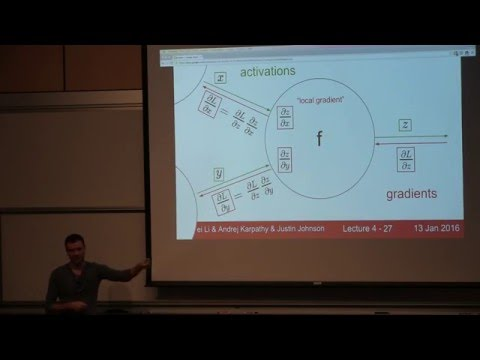

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('i94OvYb6noo',width="1000",height="500")


*  <b>Write two functions<br>
    *  Forward propagation</b>(Write your code in<font color='blue'> def forward_propagation()</b></font>)<br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

    <pre>
    <font color='green'>
def forward_propagation(X, y, W):
        <font color='grey'>
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph, <br>         ..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # now compute remaining values from computional graph and get y'
        # write code to compute the value of L=(y-y')^2
        # compute derivative of L  w.r.to Y' and store it in dl
        # Create a dictionary to store all the intermediate values
        # store L, exp,tanh,sig,dl variables
        </font>
        return (dictionary, which you might need to use for back propagation)
        <font color='grey'>
        </font>
</font>
</pre>
    *  <b>Backward propagation</b>(Write your code in<font color='blue'> def backward_propagation()</b></font>)
    </b>
    <pre>
    <font color='green'>
    def backward_propagation(L, W,dictionary):
        <font color='grey'>
        # L: the loss we calculated for the current point
        # dictionary: the outputs of the forward_propagation() function
        # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
        # Hint: you can use dict type to store the required variables 
        # return dW, dW is a dictionary with gradients of all the weights
        </font>
        return dW
        </font>
</font>
</pre>

 ## <font color='red'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is
 
 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

## <Font color='blue'>Gradient checking example</font>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function , lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}


## <font color='red'> Implement Gradient checking </font> <br>
 (Write your code in <font color='blue'> def gradient_checking()</font>)

**Algorithm** 



<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):<font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()</font>
    approx_gradients = []
    for each wi weight value in W:<font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi</font>
        approx_gradients.append(approximation gradients of weight wi)<font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with <br>  gradient_check formula</font>
    return gradient_check</font>
<b>NOTE: you can do sanity check by checking all the return values of gradient_checking(),<br> they have to be zero. if not you have bug in your code
</pre></b>

# <font color='red'> Task 2 : Optimizers </font>

* As a part of this task, you will be implementing 3 type of optimizers(methods to update weight)
* Use the same computational graph that was mentioned above to do this task
* Initilze the 9 weights from normal distribution with mean=0 and std=0.01

**Check below video and <a href='https://cs231n.github.io/neural-networks-3/'>this</a> blog**

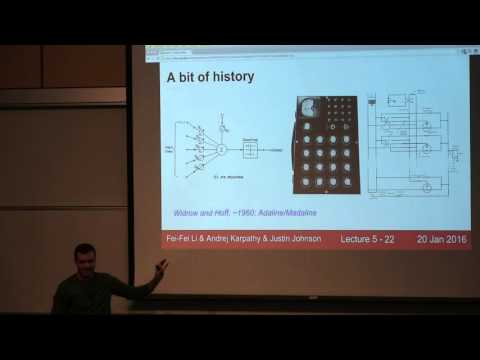

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('gYpoJMlgyXA',width="1000",height="500")

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-100):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  ex: w1 = w1-learning_rate*dw1
</pre>

## <font color='red'> Implement below tasks</b>


*  <b>Task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights<br><br>
*  <b>Task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights<br><br>
*  <b>Task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights


**Note : If you get any assertion error while running grader functions, please print the variables in grader functions and check which variable is returning False .Recheck your logic for that variable .**

<br>
<br>
<br>

# <font color='red'>Task 1 </font>

## <font color='blue'>Forward propagation </font>

In [4]:
import math
import numpy as np
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation

    return 1/(1+math.exp(-z))
    
def forward_propagation(x, y, w):
        '''In this function, we will compute the forward propagation '''
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # now compute remaining values from computional graph and get y'
        # write code to compute the value of L=(y-y')^2
        # compute derivative of L  w.r.to Y' and store it in dl
        # Create a dictionary to store all the intermediate values
        # store L, exp,tanh,sig variables

        exp = np.exp((w[0]*x[0]+w[1]*x[1])*(w[0]*x[0]+w[1]*x[1])+w[5])
        tanh = np.tanh(exp+w[6])
        sig = sigmoid((np.sin(w[2]*x[2])*((w[3]*x[3])+(w[4]*x[4])))+w[7])
        
        y_dash = sig*w[8]+tanh
        
        loss = (y-y_dash)**2
        
        dl_dy_dash = -2*(y-y_dash)

        dct = {'exp':exp,'tanh':tanh,'sigmoid':sig,'y_pred':y_dash,'loss':loss,'dy_pr':dl_dy_dash}
        
        
        return dct

<font color='cyan'>Grader function - 1</font>

In [5]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

<font color='cyan'>Grader function - 2 </font>

In [6]:
def grader_forwardprop(data):
    dl = (data['dy_pr']==-1.9285278284819143)
    loss=(data['loss']==0.9298048963072919)
    part1=(data['exp']==1.1272967040973583)
    part2=(data['tanh']==0.8417934192562146)
    part3=(data['sigmoid']==0.5279179387419721)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

## <font color='blue'>Backward propagation</font>

In [7]:
def backward_propagation(x,W,dct):
    '''In this function, we will compute the backward propagation '''
    # L: the loss we calculated for the current point
    # dictionary: the outputs of the forward_propagation() function
    # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
    # Hint: you can use dict type to store the required variables 
    # dw1 = # in dw1 compute derivative of L w.r.to w1
    # dw2 = # in dw2 compute derivative of L w.r.to w2
    # dw3 = # in dw3 compute derivative of L w.r.to w3
    # dw4 = # in dw4 compute derivative of L w.r.to w4
    # dw5 = # in dw5 compute derivative of L w.r.to w5
    # dw6 = # in dw6 compute derivative of L w.r.to w6
    # dw7 = # in dw7 compute derivative of L w.r.to w7
    # dw8 = # in dw8 compute derivative of L w.r.to w8
    # dw9 = # in dw9 compute derivative of L w.r.to w9
    
    dw7 = dct['dy_pr']*(1-np.square(dct['tanh'])) #(dL/dy_dash)*d/dw7(tanh+sigmoid*w9(constant term))
    dw6 = dw7*dct['exp']  #(dL/dy_dash)*(d/dw7(tanh+sigmoid*w9(constant term)))*(d/dw6(exp))
    dw1 = dw6*(2*((w[0]*x[0])+(w[1]*x[1]))*x[0]) #(dL/dy_dash)*(d/dw7(tanh+sigmoid*w9(constant term)))*(d/dw6(exp))*(d/dw1((w1f1+w2f2)**2))
    dw2 = dw6*(2*((w[0]*x[0])+(w[1]*x[1]))*x[1])  ##(dL/dy_dash)*(d/dw7(tanh+sigmoid*w9(constant term)))*(d/dw6(exp))*(d/dw1((w1f1+w2f2)**2))
    
    dw9 = dct['dy_pr']*dct['sigmoid'] #(dL/dy_dash)*d/dw9(tanh(constant term)+sigmoid*w9)
    dw8 = dct['dy_pr']*w[8]*dct['sigmoid']*(1-dct['sigmoid'])  #(dL/dy_dash)*d/dw8(tanh(constant term)+sigmoid*w9)
    
    dw3 = dw8*np.cos(w[2]*x[2])*x[2]*((w[3]*x[3])+(w[4]*x[4]))  #(dL/dy_dash)*d/dw8(tanh(constant term)+sigmoid*w9)*(d/dw3(sin(w3f3)*(w4f4+w5f5)))
    dw4 = dw8*np.sin(w[2]*x[2])*x[3]  #(dL/dy_dash)*d/dw8(tanh(constant term)+sigmoid*w9)*(d/dw4(sin(w3f3)*(w4f4+w5f5)))

    dw5 = dw8*np.sin(w[2]*x[2])*x[4]   #(dL/dy_dash)*d/dw8(tanh(constant term)+sigmoid*w9)*(d/dw5(sin(w3f3)*(w4f4+w5f5)))

    
    dw = {'dw1':dw1,'dw2':dw2,'dw3':dw3,'dw4':dw4,'dw5':dw5,'dw6':dw6,'dw7':dw7,'dw8':dw8,'dw9':dw9}
    return dw

    # return dW, dW is a dictionary with gradients of all the weights

<font color='cyan'>Grader function - 3 </font>

In [8]:
def grader_backprop(data):
    dw1=(data['dw1']==-0.22973323498702003)
    dw2=(data['dw2']==-0.021407614717752925)
    dw3=(data['dw3']==-0.005625405580266319)
    dw4=(data['dw4']==-0.004657941222712423)
    dw5=(data['dw5']==-0.0010077228498574246)
    dw6=(data['dw6']==-0.6334751873437471)
    dw7=(data['dw7']==-0.561941842854033)
    dw8=(data['dw8']==-0.04806288407316516)
    dw9=(data['dw9']==-1.0181044360187037)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
d1=backward_propagation(X[0],w,d1)
grader_backprop(d1)

True

## <font color='blue'> Implement gradient checking</font>

In [9]:
import copy
W = np.ones(9)*0.1
def gradient_checking(data_point, W):
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()
    forward = forward_propagation(data_point[:5],data_point[-1],W)
    backword = backward_propagation(data_point[:5],W,forward)
    #print(backword.values())
    backword_grad_values_list=list(backword.values())
    print(backword_grad_values_list)
    
    eps = 0.0001
    approx_gradients = []
    for  i  in range(len(W)):
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi
        w_add = copy.deepcopy(W)
        w_add[i]+=eps       # Adding epsilon value
        forw_add_dct = forward_propagation(data_point[:5],data_point[-1],w_add)    #finding loss by adding epsilon to wi
        forw_add = forw_add_dct['loss']
        
        w_subt = copy.deepcopy(W)
        w_subt[i]-=eps
        forw_subt_dct = forward_propagation(data_point[:5],data_point[-1],w_subt)   #finding loss by substracting epsilon to wi
        forw_subt = forw_subt_dct['loss']
        
        approx_gradients.append((forw_add-forw_subt)/(2*eps))
    
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with gradient_check formula
    print(approx_gradients)
    gradient_check=np.array(backword_grad_values_list)-np.array(approx_gradients)
    denom=np.array(backword_grad_values_list)+np.array(approx_gradients)
    return gradient_check/denom

In [10]:
gradient_checking(data[0],W)

[-0.22973323498702003, -0.021407614717752925, -0.005625405580266319, -0.004657941222712423, -0.0010077228498574246, -0.6334751873437471, -0.561941842854033, -0.04806288407316516, -1.0181044360187037]
[-0.22973323022201786, -0.021407614714252787, -0.0056254055608162545, -0.004657941222729889, -0.0010077228507210378, -0.6334751863795729, -0.5619418463920223, -0.0480628840343611, -1.0181044360180191]


array([ 1.03707289e-08,  8.17498289e-11,  1.72877000e-09, -1.87486944e-12,
       -4.28497388e-10,  7.61019693e-10, -3.14800301e-09,  4.03680146e-10,
        3.36195135e-13])

# <font color='red'>Task 2: Optimizers

###<font color='blue'>Algorithm with Vanilla update of weights</font>

In [11]:
W=np.random.normal(0,0.01,9)

In [12]:
W

array([-0.01956522,  0.0035906 ,  0.00154059, -0.00566784,  0.0005658 ,
       -0.00584009, -0.01834586,  0.00406   , -0.00475218])

In [13]:
W_vanilla=copy.deepcopy(W)
lr = 0.001
loss_vanilla = []
for i in range(25):
    for data_point in data:
        forward_prop = forward_propagation(data_point[:5],data_point[-1],W_vanilla)
        backword_prop = backward_propagation(data_point[:5],W_vanilla,forward_prop)
        
        #print(backword_prop.values())
        #print(backword_prop.keys())
        grad_vals=np.array(list(backword_prop.values()))
        
        W_vanilla=W_vanilla-(grad_vals*lr)
    loss_vanilla.append(forward_prop['loss'])
    print('epoch ',i+1,': ',forward_prop['loss'])

epoch  1 :  0.23362104679932733
epoch  2 :  0.0898047515447518
epoch  3 :  0.030436133076949524
epoch  4 :  0.006990352376287715
epoch  5 :  0.000270726136434491
epoch  6 :  0.001123051973593673
epoch  7 :  0.005009646553299076
epoch  8 :  0.009721407152475287
epoch  9 :  0.014248219145919566
epoch  10 :  0.018189822053121855
epoch  11 :  0.02144477149135231
epoch  12 :  0.024047661562036676
epoch  13 :  0.02608599167045563
epoch  14 :  0.027659532678441866
epoch  15 :  0.02886198909893271
epoch  16 :  0.02977402755511815
epoch  17 :  0.030461831680552692
epoch  18 :  0.030978124712921138
epoch  19 :  0.031364106224883455
epoch  20 :  0.031651552396707444
epoch  21 :  0.031864748592028376
epoch  22 :  0.032022135071323024
epoch  23 :  0.03213764844167357
epoch  24 :  0.032221785782065714
epoch  25 :  0.03228243381642426


<font color='blue'>Plot between epochs and loss</font>

Text(0, 0.5, 'loss')

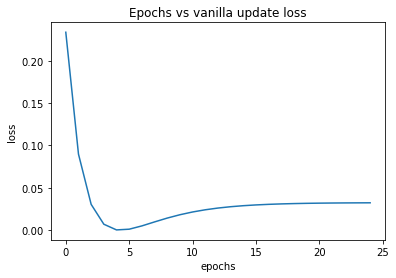

In [14]:
epochs = list(range(25))
plt.plot(epochs,loss_vanilla)
plt.title('Epochs vs vanilla update loss')
plt.xlabel('epochs')
plt.ylabel('loss')

###<font color='blue'>Algorithm with momentum update of weights</font>

In [15]:
W

array([-0.01956522,  0.0035906 ,  0.00154059, -0.00566784,  0.0005658 ,
       -0.00584009, -0.01834586,  0.00406   , -0.00475218])

In [16]:
lr = 0.001
gamma = 0.0001
loss_momentum = []
prev_grads = np.zeros(9)
W_momentum = copy.deepcopy(W)
for i in range(25):
    #print(prev_grads)
    for data_point in data:
        forward_prop = forward_propagation(data_point[0:5],data_point[-1],W_momentum)
        backward_prop = backward_propagation(data_point[0:5],W_momentum,forward_prop)
        
        grads=np.array(list(backward_prop.values()))
        v = (gamma*prev_grads)+(lr*grads)
        prev_grads=grads

        W_momentum=W_momentum-v
        
    print('epoch',i+1,' : ',forward_prop['loss'])
    loss_momentum.append(forward_prop['loss'])

epoch 1  :  0.21210127827366174
epoch 2  :  0.073266691031967
epoch 3  :  0.020649884102166196
epoch 4  :  0.0028902370788190302
epoch 5  :  0.0001203911827098846
epoch 6  :  0.003341728292804456
epoch 7  :  0.008418349295028816
epoch 8  :  0.01354025065814306
epoch 9  :  0.018011094827677453
epoch 10  :  0.021649536184009294
epoch 11  :  0.024494662437878022
epoch 12  :  0.02666477045557592
epoch 13  :  0.02829302833054045
epoch 14  :  0.029500929009916268
epoch 15  :  0.030389664136983508
epoch 16  :  0.03103947610175747
epoch 17  :  0.03151214363637861
epoch 18  :  0.03185433979334676
epoch 19  :  0.03210088460356498
epoch 20  :  0.03227753291319639
epoch 21  :  0.032403220932836964
epoch 22  :  0.03249181303324148
epoch 23  :  0.0325534299026083
epoch 24  :  0.03259544367216233
epoch 25  :  0.03262321614243649


<font color='blue'>Plot between epochs and loss</font>

Text(0, 0.5, 'loss')

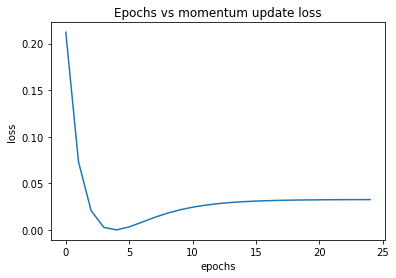

In [17]:
epochs = list(range(25))
plt.plot(epochs,loss_momentum)
plt.title('Epochs vs momentum update loss')
plt.xlabel('epochs')
plt.ylabel('loss')

###<font color='blue'>Algorithm with Adam update of weights</font>

In [18]:
np.square(np.array([3,5,3,6]))

array([ 9, 25,  9, 36], dtype=int32)

In [19]:
W

array([-0.01956522,  0.0035906 ,  0.00154059, -0.00566784,  0.0005658 ,
       -0.00584009, -0.01834586,  0.00406   , -0.00475218])

In [20]:
learn_rate = 0.001
beta1 = 0.9
beta2 = 0.99  #typical values 
eps = 1e-8
prev_grads = np.zeros(9)
prev_grad_sq = np.zeros(9)
W_adam = copy.deepcopy(W)
loss_adam = []
for i in range(25):
    
    for data_point in data:
        forward_prop = forward_propagation(data_point[0:5],data_point[-1],W_adam)
        backward_prop = backward_propagation(data_point[0:5],W_adam,forward_prop)

        #keys = list(backward_prop.keys())
        #print(backward_prop.keys())
        
        grads=np.array(list(backward_prop.values()))  #grads after back-prop
            
        m = beta1*prev_grads+((1-beta1)*grads)  #1st order eda
        v = (beta2*prev_grad_sq)+((1-beta2)*np.square(grads))  #2nd order eda
        prev_grads = grads
        prev_grad_sq = np.square(grads)
        
        W_adam = W_adam - ((learn_rate*m)/(np.sqrt(v)+eps))  #simplified update of eda
    loss_adam.append(forward_prop['loss'])
    print('epoch',i+1,': ',forward_prop['loss'])

epoch 1 :  0.09803462862399039
epoch 2 :  0.003544403136854988
epoch 3 :  0.011902007014408127
epoch 4 :  8.943779958532665e-05
epoch 5 :  2.7135939528601906e-06
epoch 6 :  4.1888890466055355e-06
epoch 7 :  8.489993069278143e-08
epoch 8 :  8.499161448757702e-08
epoch 9 :  3.2261815836408676e-06
epoch 10 :  5.294301179937495e-07
epoch 11 :  2.0146401780192923e-07
epoch 12 :  5.622202982663182e-07
epoch 13 :  5.467824286731101e-08
epoch 14 :  2.780636318854331e-06
epoch 15 :  9.541184247877183e-06
epoch 16 :  2.1876871508511613e-05
epoch 17 :  3.354777992603412e-05
epoch 18 :  5.862796468401995e-05
epoch 19 :  0.0001057355392870204
epoch 20 :  0.00019915795190499614
epoch 21 :  0.0002039914858649209
epoch 22 :  0.0003340077989302296
epoch 23 :  0.0003492849614298512
epoch 24 :  0.00048009641748731377
epoch 25 :  0.0005921874004764226


<font color='blue'>Plot between epochs and loss</font>

Text(0, 0.5, 'loss')

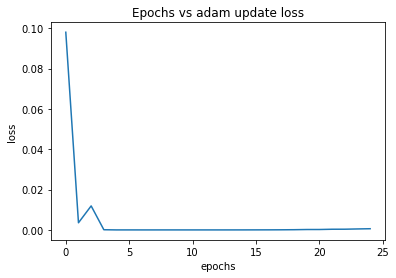

In [21]:
epochs = list(range(25))
plt.plot(epochs,loss_adam)
plt.title('Epochs vs adam update loss')
plt.xlabel('epochs')
plt.ylabel('loss')


<font color='blue'>Algorithm with Adam(bias corrected) update of weights</font>

In [22]:
learn_rate = 0.001
beta1 = 0.9
beta2 = 0.99
eps = 1e-8
prev_grads = np.zeros(9)
prev_grad_sq = np.zeros(9)
W_adam_bias_corrected = copy.deepcopy(W)
loss_adam_bias_corrected = []
t = 1
for i in range(25):
    
    for data_point in data:
        forward_prop = forward_propagation(data_point[0:5],data_point[-1],W_adam_bias_corrected)
        backward_prop = backward_propagation(data_point[0:5],W_adam_bias_corrected,forward_prop)

        #keys = list(backward_prop.keys())
        #print(backward_prop.keys())
        
        grads=np.array(list(backward_prop.values()))  #grads after back-prop
            
        m = beta1*prev_grads+((1-beta1)*grads)  #1st order eda
        mt = m/(1-beta1**t) #bias crrection of 1st order
        v = (beta2*prev_grad_sq)+((1-beta2)*np.square(grads))  #2nd order eda
        vt = v/(1-beta2**t)
        prev_grads = grads   #bias correction of 2nd order
        prev_grad_sq = np.square(grads)
        t+=1
        
        W_adam_bias_corrected = W_adam_bias_corrected - ((learn_rate*mt)/(np.sqrt(vt)+eps))  #bias corrected update
    loss_adam_bias_corrected.append(forward_prop['loss'])
    print('epoch',i+1,': ',forward_prop['loss'])

epoch 1 :  0.13109911184301407
epoch 2 :  0.00019165315960077397
epoch 3 :  0.015959072844732122
epoch 4 :  0.0003108366562727476
epoch 5 :  1.5374617854564895e-07
epoch 6 :  1.8677064988396451e-06
epoch 7 :  3.1184050712635683e-07
epoch 8 :  1.3323592937990934e-09
epoch 9 :  1.3985508384783744e-06
epoch 10 :  1.0351379085739029e-06
epoch 11 :  1.674130864745745e-06
epoch 12 :  2.153460341897992e-06
epoch 13 :  1.7382924270140695e-06
epoch 14 :  7.5060095922493985e-06
epoch 15 :  2.265857893141701e-05
epoch 16 :  3.987152060877834e-05
epoch 17 :  6.73391660039641e-05
epoch 18 :  0.00010737891364468149
epoch 19 :  0.00020102526963527623
epoch 20 :  0.00024390653050801597
epoch 21 :  0.00037438688923272016
epoch 22 :  0.0004258576511627962
epoch 23 :  0.000535941396636636
epoch 24 :  0.0007338440509652881
epoch 25 :  0.0008333459095924702


<font color='blue'>Comparision plot between epochs and loss with different optimizers</font>

In [23]:
#vanilla_loss

In [24]:
#loss_momentum

In [25]:
#loss_adam

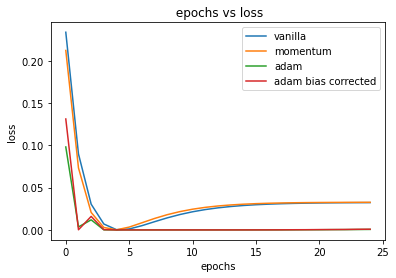

In [26]:
x_axis = list(range(25))
plt.plot(x_axis,loss_vanilla,label='vanilla')
plt.plot(x_axis,loss_momentum,label='momentum')
plt.plot(x_axis,loss_adam,label='adam')
plt.plot(x_axis,loss_adam_bias_corrected,label='adam bias corrected')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title(' epochs vs loss')
plt.legend()

In [27]:
W

array([-0.01956522,  0.0035906 ,  0.00154059, -0.00566784,  0.0005658 ,
       -0.00584009, -0.01834586,  0.00406   , -0.00475218])

### So Adam optimizer is converging faster compared to Vanilla and Momentum optimizers